# 1. Importing libraries and data
# 2. Data cleaning
# 3. Data prep for regression analysis
# 4. Regression analysis
# 5. Bonus: Performance improvement after removing outliers

# 1. Importing libraries and data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/6.1' 
# Get Electric Vehicle df
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared', 'EV_cleaner.pkl'))

# 2. Data cleaning

In [9]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'ER'],
      dtype='object')

In [8]:
df.head(20)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ER
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Long-range
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10,Long-range
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,Unknown
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10,Mid-range
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10,Mid-range
5,5YJSA1DN0C,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0,186637195,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,Long-range
6,WBY1Z6C30H,King,Bellevue,WA,98004.0,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,196789610,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,Mid-range
7,3MW5P9J0XN,Snohomish,Marysville,WA,98271.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,204822761,POINT (-122.1677 48.11026),PUGET SOUND ENERGY INC,5.306105e+10,Mid-range
8,5YJ3E1EA6J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2039222,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,Long-range
9,5YJ3E1EA2J,King,Redmond,WA,98052.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,474817283,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Long-range


In [10]:
df.shape

(235688, 17)

In [12]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
ER                                                   0
dtype: int64

In [14]:
dups = df.duplicated()

In [16]:
dups.shape # no dups

(235688,)

In [20]:
# Impute mean actual Base MSRP to replace 0 values in Base MSRP column.
a = np.array(df['Base MSRP'])
m = np.ma.masked_equal(a, 0) # mask = [0, 0, 0, 1, 0]
print (m)

[-- -- -- ... -- -- --]


In [24]:
m.min()

31950.0

In [30]:
mean_value = m.mean()

In [32]:
# Actual mean = 57136.66473988439
# Replace 0 values in the DataFrame with the mean
df['Base MSRP'] = df['Base MSRP'].replace(0, mean_value)

In [35]:
df['Base MSRP'].value_counts(dropna=False)

Base MSRP
57136.66474     232401
69900.00000       1318
31950.00000        361
52900.00000        215
32250.00000        133
59900.00000        126
54950.00000        119
39995.00000        117
36900.00000        105
44100.00000         91
64950.00000         87
45600.00000         79
33950.00000         71
52650.00000         71
34995.00000         67
55700.00000         57
36800.00000         55
53400.00000         38
88392.00000         36
110950.00000        21
81100.00000         21
98950.00000         21
90700.00000         17
75095.00000         13
102000.00000        11
184400.00000        10
43700.00000          8
109000.00000         7
89100.00000          6
91250.00000          4
32995.00000          2
Name: count, dtype: int64

In [37]:
# Export new df
# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data','Prepared', 'EV_with_mean.pkl'))

In [7]:
# Get Electric Vehicle df
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared', 'EV_with_mean.pkl'))

In [9]:
df.shape

(235688, 17)

In [11]:
df['Base MSRP'].value_counts(dropna=False)

Base MSRP
57136.66474     232401
69900.00000       1318
31950.00000        361
52900.00000        215
32250.00000        133
59900.00000        126
54950.00000        119
39995.00000        117
36900.00000        105
44100.00000         91
64950.00000         87
45600.00000         79
33950.00000         71
52650.00000         71
34995.00000         67
55700.00000         57
36800.00000         55
53400.00000         38
88392.00000         36
110950.00000        21
81100.00000         21
98950.00000         21
90700.00000         17
75095.00000         13
102000.00000        11
184400.00000        10
43700.00000          8
109000.00000         7
89100.00000          6
91250.00000          4
32995.00000          2
Name: count, dtype: int64

# 3. Data prep for regression analysis

In [13]:
sns.distplot(df['Base MSRP'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_29986/3269510218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Base MSRP'], bins=25) # Shows extreme values


<Axes: xlabel='Base MSRP', ylabel='Density'>

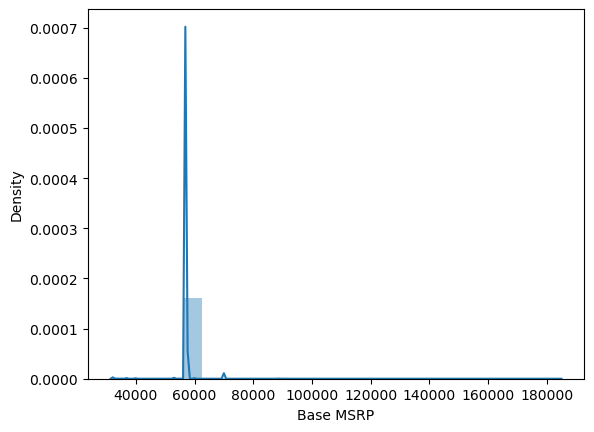

In [41]:
plt.show()

In [51]:
df['Base MSRP'].mean() # Check the mean

57136.664739884414

In [53]:
df['Base MSRP'].median() # Check the median

57136.66473988439

In [55]:
df['Base MSRP'].max() # Check the max

184400.0

In [15]:
sns.distplot(df['Electric Range'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_29986/4013865130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Electric Range'], bins=25) # Shows extreme values


<Axes: xlabel='Electric Range', ylabel='Density'>

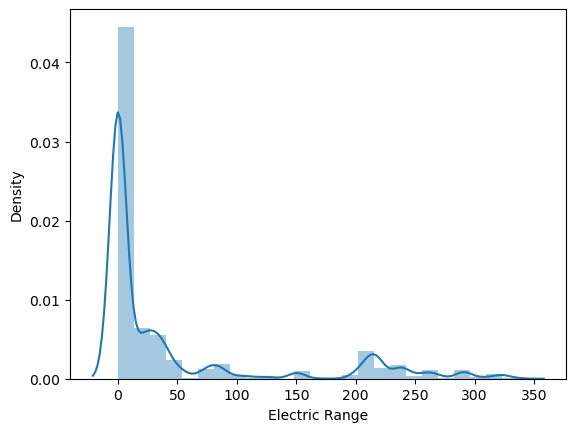

In [39]:
plt.show()

In [17]:
# Create subset without unknown ER to exclude cases where range is unknown (coded as 0)
Known = df[df['ER'] != 'Unknown']

In [19]:
Known.shape #large enough for project!

(95928, 17)

In [21]:
Known['Electric Range'].value_counts(dropna=False)

Electric Range
215.0    6403
32.0     5417
25.0     4668
21.0     4574
238.0    4262
         ... 
51.0        5
11.0        4
95.0        3
57.0        2
45.0        1
Name: count, Length: 109, dtype: int64

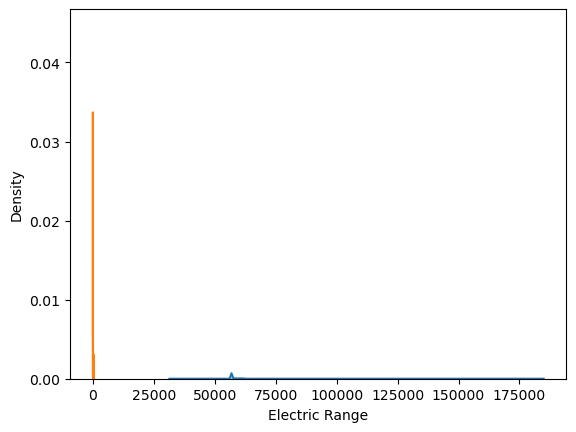

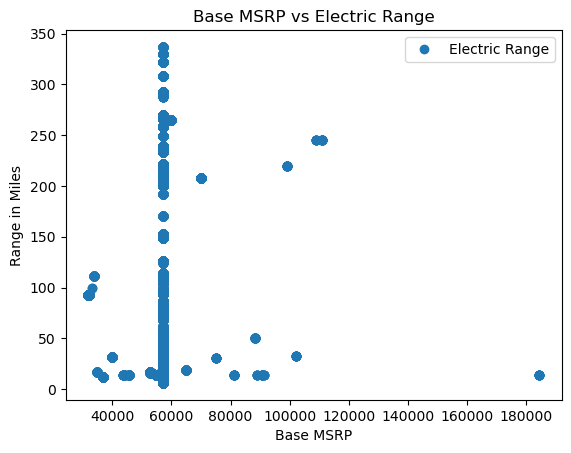

In [23]:
# Hypothesis the higher the Base MSRP, the longer the Electric Range
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

Known.plot(x = 'Base MSRP', y='Electric Range',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Base MSRP vs Electric Range')  
plt.xlabel('Base MSRP')  
plt.ylabel('Range in Miles')  
plt.show()

In [25]:
# Looks super random outside of imputed mean values
# Reshape the variables into NumPy arrays and put them into separate objects.

X = Known['Base MSRP'].values.reshape(-1,1)
y = Known['Electric Range'].values.reshape(-1,1)

In [27]:
X

array([[57136.66473988],
       [57136.66473988],
       [57136.66473988],
       ...,
       [57136.66473988],
       [57136.66473988],
       [57136.66473988]])

In [29]:
y

array([[220.],
       [291.],
       [ 30.],
       ...,
       [ 21.],
       [249.],
       [ 19.]])

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# 4. Regression analysis

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

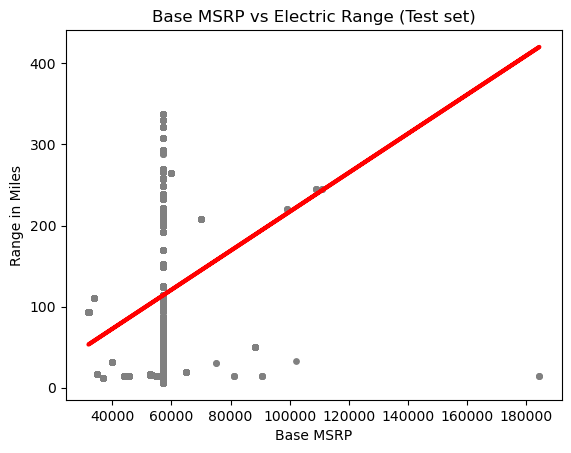

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Base MSRP vs Electric Range (Test set)')
plot_test.xlabel('Base MSRP')
plot_test.ylabel('Range in Miles')
plot_test.show() # here we have a positive relationship but not strong as data points are not near the line, as expected.

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00240683]]
Mean squared error:  9590.072201583627
R2 score:  0.00764010604054588


In [45]:
y_predicted

array([[113.9477074],
       [113.9477074],
       [113.9477074],
       ...,
       [113.9477074],
       [113.9477074],
       [113.9477074]])

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30) # wild variations

,Actual,Predicted
0,20.0,113.947707
1,238.0,113.947707
2,249.0,113.947707
3,33.0,113.947707
4,151.0,113.947707
5,215.0,113.947707
6,215.0,113.947707
7,23.0,113.947707
8,238.0,113.947707
9,239.0,113.947707


In [49]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2) # R value close to zero, very weak.

Slope: [[0.00240683]]
Mean squared error:  9633.829705720726
R2 score:  0.007075306222205535


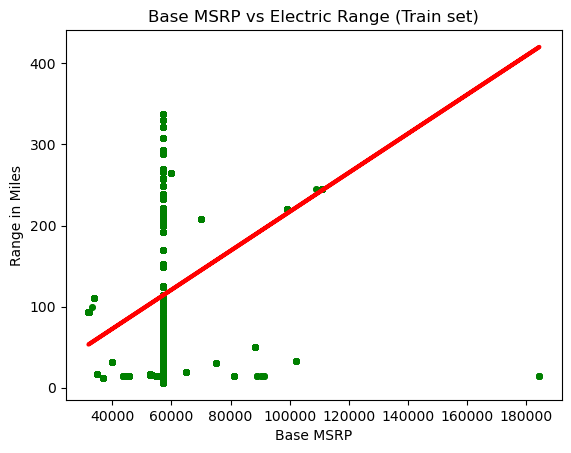

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Base MSRP vs Electric Range (Train set)')
plot_test.xlabel('Base MSRP')
plot_test.ylabel('Range in Miles')
plot_test.show()

In [ ]:
# No outliers to remove to test further. Model performed as expected given the excess imputed values which affect results. 
# Still lots of variation here. Not a strong correlation between BASE PRICE and Electric Range. 
# Looks like there is no point paying more than medium base range for your EV if you value going further on your battery. Look for another predictor of Electric Range: unfortunately no more is current dataset. 